In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Diabetes Missing Data.csv")
print(df)

     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0           6    148.0          72.0       35.0            NaN  33.6   
1           1     85.0          66.0       29.0            NaN  26.6   
2           8    183.0          64.0        NaN            NaN  23.3   
3           1     89.0          66.0       23.0           94.0  28.1   
4           0    137.0          40.0       35.0          168.0  43.1   
..        ...      ...           ...        ...            ...   ...   
763        10    101.0          76.0       48.0          180.0  32.9   
764         2    122.0          70.0       27.0            NaN  36.8   
765         5    121.0          72.0       23.0          112.0  26.2   
766         1    126.0          60.0        NaN            NaN  30.1   
767         1     93.0          70.0       31.0            NaN  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2                0.672  

In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [6]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
print(df[df.duplicated()])
df.duplicated().any()

Empty DataFrame
Columns: [Pregnant, Glucose, Diastolic_BP, Skin_Fold, Serum_Insulin, BMI, Diabetes_Pedigree, Age, Class]
Index: []


False

In [10]:
df.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [11]:
print(df.duplicated().sum())

0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().any()

Pregnant             False
Glucose               True
Diastolic_BP          True
Skin_Fold             True
Serum_Insulin         True
BMI                   True
Diabetes_Pedigree    False
Age                  False
Class                False
dtype: bool

In [15]:
#way1: dropping the null columns
print("before dropping",df.shape)
dff=df.dropna()
print("after dropping",df.shape)
print("after dropping",dff.shape)

before dropping (768, 9)
after dropping (768, 9)
after dropping (392, 9)


In [16]:
print(df["Skin_Fold"].isnull().sum())

227


In [17]:
#way2filling the null columns with mean
for col in df.columns:
    if df[col].dtype in ['float64','int64']:
        if df[col].isnull().any():
            mean=df[col].mean()
            df[col]=df[col].fillna(mean)

In [18]:
print(df["Skin_Fold"].isnull().sum())

0


In [19]:
df['Skin_Fold']=df['Skin_Fold'].astype('int64')
#truncate the floating values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            768 non-null    float64
 2   Diastolic_BP       768 non-null    float64
 3   Skin_Fold          768 non-null    int64  
 4   Serum_Insulin      768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [21]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1


In [22]:
for col in df.columns:
    if df[col].dtype in ['float64']:
        df[col]=df[col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pregnant           768 non-null    int64
 1   Glucose            768 non-null    int64
 2   Diastolic_BP       768 non-null    int64
 3   Skin_Fold          768 non-null    int64
 4   Serum_Insulin      768 non-null    int64
 5   BMI                768 non-null    int64
 6   Diabetes_Pedigree  768 non-null    int64
 7   Age                768 non-null    int64
 8   Class              768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [23]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148,72,35,155,33,0,50,1
1,1,85,66,29,155,26,0,31,0
2,8,183,64,29,155,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [24]:
import pandas as pd
df2=pd.read_csv("Automobile_data.csv")


In [25]:
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [26]:
df2.shape

(205, 26)

In [29]:
print(df2.duplicated().sum())
df2.duplicated().any()

0


False

In [32]:
df2.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [33]:
df2['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [35]:
for col in df2.columns:
    if df2[col].dtypes in['object']:
        df2[col]=df2[col].str.replace('[^a-zA-Z0-9]','',regex=True)

In [36]:
print(df2['make'])
print(df2['symboling'].dtype)
print(df2['make'].dtype)



0      alfaromero
1      alfaromero
2      alfaromero
3            audi
4            audi
          ...    
200         volvo
201         volvo
202         volvo
203         volvo
204         volvo
Name: make, Length: 205, dtype: object
int64
object


In [37]:
# for col in df2.columns:
#     if df2[col].dtypes in['object']:
#         df2[col]=pd.to_numeric(df2[col],errors='coerce')

In [38]:
print(df2['price'].dtype)
df2['price'] = pd.to_numeric(df2['price'], errors='coerce').astype('Int64')#if astype is removed , it'll be float64
print(df2['price'].dtype)


object
Int64


In [39]:
print(df2['price'])

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: Int64


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df2['num-of-doors'])
df2['num-of-doors']=le.fit_transform(df2['num-of-doors'])
print(df2['num-of-doors'])


0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object
0      2
1      2
2      2
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: num-of-doors, Length: 205, dtype: int32


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pregnant           768 non-null    int64
 1   Glucose            768 non-null    int64
 2   Diastolic_BP       768 non-null    int64
 3   Skin_Fold          768 non-null    int64
 4   Serum_Insulin      768 non-null    int64
 5   BMI                768 non-null    int64
 6   Diabetes_Pedigree  768 non-null    int64
 7   Age                768 non-null    int64
 8   Class              768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [42]:
df['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

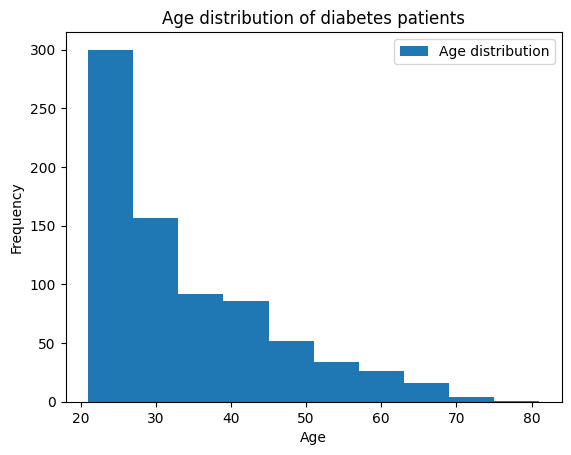

In [48]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins = 10,label ='Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of diabetes patients')
plt.legend()
plt.show()

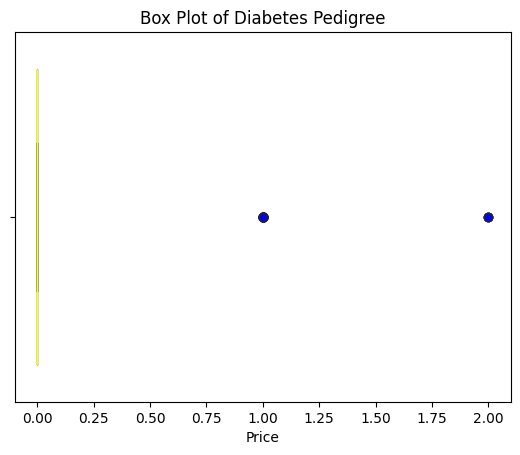

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x= df['Diabetes_Pedigree'], color= 'green',
           flierprops = {'marker': 'o','markerfacecolor':'blue'},
           medianprops = {'color':'yellow'},
           whiskerprops = {'color':'red','linestyle':'--'})
plt.xlabel('Price')
plt.title('Box Plot of Diabetes Pedigree')
plt.show()

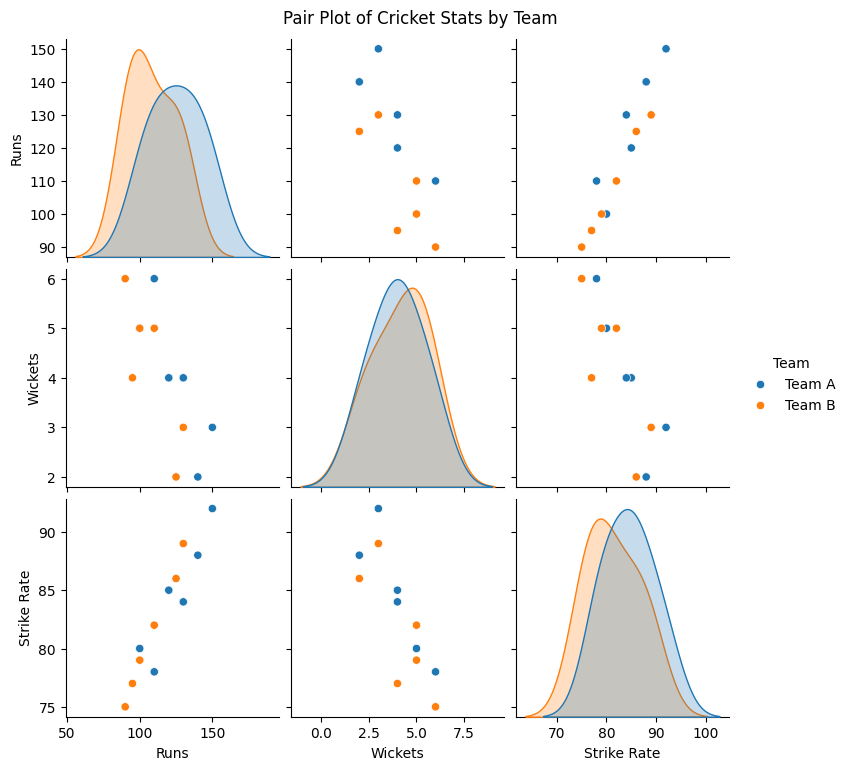

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset for two teams with multiple features
data = {
    'Team': ['Team A'] * 6 + ['Team B'] * 6,
    'Runs': [100, 120, 110, 150, 140, 130, 90, 100, 95, 130, 125, 110],
    'Wickets': [5, 4, 6, 3, 2, 4, 6, 5, 4, 3, 2, 5],
    'Strike Rate': [80, 85, 78, 92, 88, 84, 75, 79, 77, 89, 86, 82]
}

df = pd.DataFrame(data)

# Create the pair plot
sns.pairplot(df, hue='Team', diag_kind='kde')  # 'hue' adds color by team

# Show the plot
plt.suptitle('Pair Plot of Cricket Stats by Team', y=1.02)
plt.show()


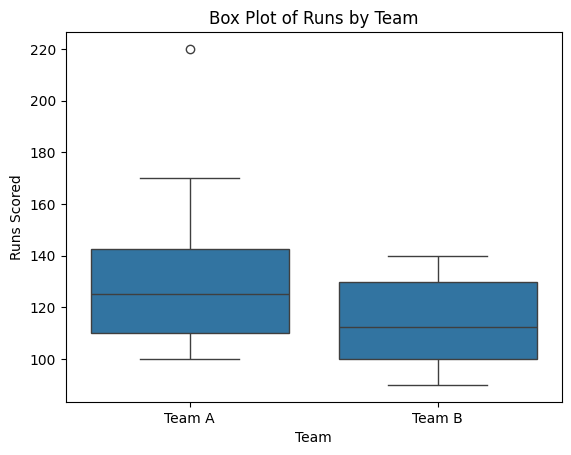

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Runs scored by Team A and Team B
data = {
    'Team': ['Team A'] * 12 + ['Team B'] * 12,
    'Runs': [100, 120, 110, 150, 110, 140, 130, 170, 120, 220, 140, 110,
             90, 100, 95, 130, 125, 110, 115, 135, 105, 140, 130, 100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create grouped box plot
sns.boxplot(data=df, x='Team', y='Runs')

# Customize plot
plt.title('Box Plot of Runs by Team')
plt.ylabel('Runs Scored')
plt.xlabel('Team')
plt.show()


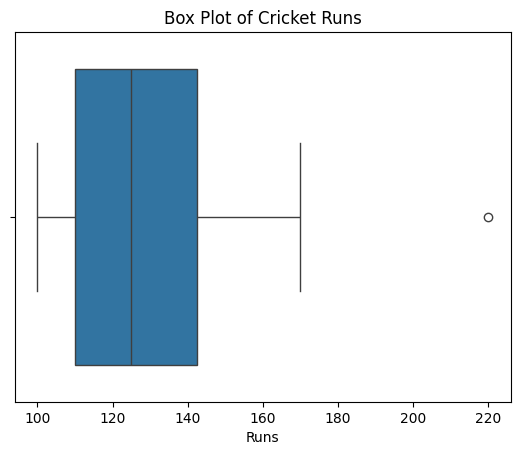

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset: Runs scored in 12 matches
runs = [100, 120, 110, 150, 110, 140, 130, 170, 120, 220, 140, 110]

# Create a DataFrame
df = pd.DataFrame({'Runs': runs})

# Create the box plot
sns.boxplot(data=df, x='Runs')

# Customize the plot
plt.title('Box Plot of Cricket Runs')
plt.xlabel('Runs')
plt.show()
